# matplotlib

axis：设置坐标轴边界和表面的颜色、坐标刻度值大小和网格的显示  
figure: 控制dpi、边界颜色、图形大小、和子区( subplot)设置  
font: 字体集（font family）、字体大小和样式设置  
grid: 设置网格颜色和线性  
legend: 设置图例和其中的文本的显示  
line: 设置线条（颜色、线型、宽度等）和标记   
patch: 是填充2D空间的图形对象，如多边形和圆。控制线宽、颜色和抗锯齿设置等。  
savefig: 可以对保存的图形进行单独设置。例如，设置渲染的文件的背景为白色。  
verbose: 设置matplotlib在执行期间信息输出，如silent、helpful、debug和debug-annoying。  
xticks和yticks: 为x,y轴的主刻度和次刻度设置颜色、大小、方向，以及标签大小。  

## 绘制矢量图 
``` python
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#plt.savefig('tmp.pdf', bbox_inches='tight')  # 图导出为pdf在当前目录下
plt.show()
```

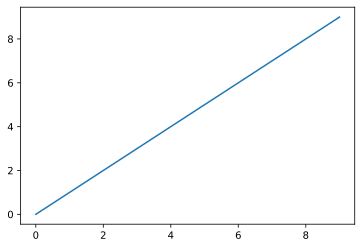

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

data = np.arange(10)
plt.plot(data)

plt.show()

## 图片(figure)与子图--subplot()
* matplotlib 绘制的图位于 图片(figure)中
* subplot_adjust()更改间距,也可用作顶层函数
```
subplot_adjust(wapace=None,hspace=None)
```

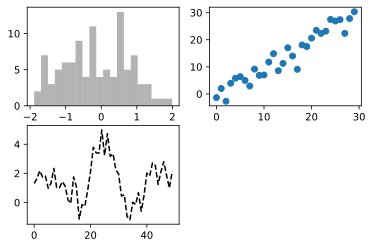

In [28]:
# method 1
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)  #  创建空白图
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

plt.plot(np.random.randn(50).cumsum(), 'k--')  # 默认从最后一个空白图开始创建
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

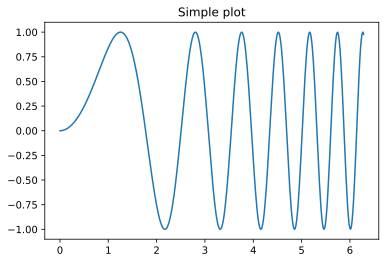

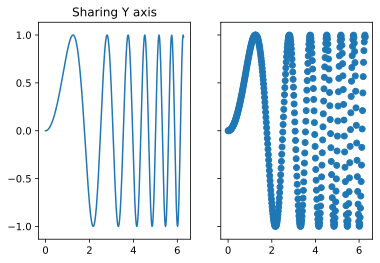

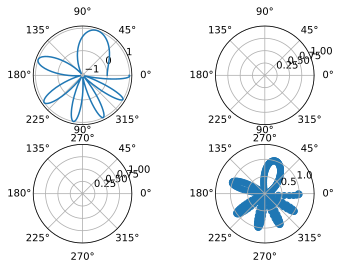

In [41]:
 # First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axes[0, 0].plot(x, y)  # 像二维数组一样进行索引
axes[1, 1].scatter(x, y)

D:\Program_python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


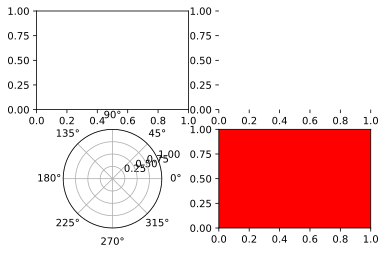

In [77]:
plt.subplot(221)

# equivalent but more general
ax1=plt.subplot(2, 2, 1)

# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')

# delete ax2 from the figure
plt.delaxes(ax2)

# add ax2 to the figure again
plt.subplot(ax2)

## 颜色,标记和线类型
主函数plot()接收带有x和y轴的数组和可选的字符串缩写参数指明颜色和线类型.



In [64]:
import matplotlib.pyplot as plt
plt.plot?

## 刻度,标签和图例
* xlim() 返回当前绘图范围,传入参数([1,10])时设置范围
* xticks 设置刻度位置
* xticklables 设置刻度标签
对应于子图的方法,如:  
plt.xlim()对应ax.get_lim()  
plt.xlim([0,10])对应ax.set_lim([0,10])

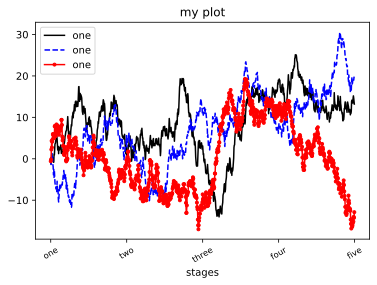

In [97]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

"""
添加图例(传递label参数)
"""
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'b--', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'r.-', label='one')
ax.legend()
# plt.legend() # 等同ax.legend()


"""
刻度设置
"""
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')
"""
图属性设置
"""
# method 1
# ax.set_title('my plot')
# ax.set_xlabel('stages') 

# method 2 使用set()方法批量设置图属性
props = {
    'title': 'my plot',
    'xlabel': 'stages'
}
ax.set(**props)

"""
保存图片
"""
plt.savefig('figpath.svg')
# plt.savefig('figpath.svg', dpi=400, bbox_inches='tight')

## 注释与子图加工
* 添加注释和文本--text, arrow, annote 方法
* 简单图形--可在plt中使用(rectangle, circle, polygon)
* 图像的全集 库--matplotlib.patches : 


Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

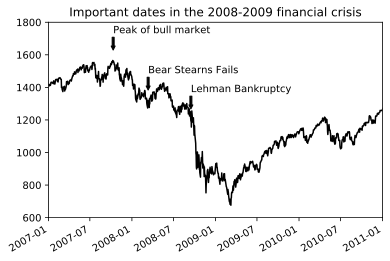

In [99]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

## 图片保存到文件
* 文件保存类型由后缀名推得
* 参数:dpi, bbox_inches

In [94]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

## Matplotlib 设置
plt.rc()

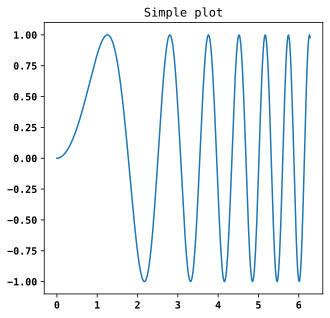

In [127]:
 # First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

"""
Matplotlib参数设置(要多运行几次)
"""
plt.rc('figure', figsize=(5, 5))
font_options = {'family' : 'monospace', 
                'weight' : 'bold',
                'size' : '10'} 
plt.rc('font', **font_options)

# 完整版matplotlib画图

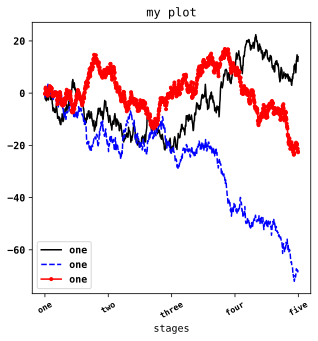

In [128]:
# 单幅多图

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

"""
添加图例(传递label参数)
"""
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'b--', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'r.-', label='one')
ax.legend()
# plt.legend() # 等同ax.legend()


"""
刻度设置
"""
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')
"""
图属性设置
"""
# method 1
# ax.set_title('my plot')
# ax.set_xlabel('stages') 

# method 2 使用set()方法批量设置图属性
props = {
    'title': 'my plot',
    'xlabel': 'stages'
}
ax.set(**props)

"""
保存图片
"""
plt.savefig('figpath.svg')
# plt.savefig('figpath.svg', dpi=400, bbox_inches='tight')

"""
Matplotlib参数设置(要多运行几次)
"""
plt.rc('figure', figsize=(5, 5))
font_options = {'family' : 'monospace', 
                'weight' : 'bold',
                'size' : '10'} 
plt.rc('font', **font_options)


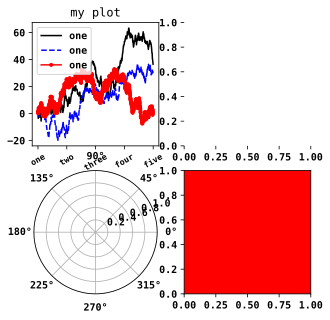

In [133]:
# 多图
# 单幅多图




fig = plt.figure()
ax = fig.add_subplot(2,2,1)

"""
添加图例(传递label参数)
"""
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'b--', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'r.-', label='one')
ax.legend()
# plt.legend() # 等同ax.legend()


"""
刻度设置
"""
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')
"""
图属性设置
"""
# method 1
# ax.set_title('my plot')
# ax.set_xlabel('stages') 

# method 2 使用set()方法批量设置图属性
props = {
    'title': 'my plot',
    'xlabel': 'stages'
}
ax.set(**props)

"""
保存图片
"""
plt.savefig('figpath.svg')
# plt.savefig('figpath.svg', dpi=400, bbox_inches='tight')

"""
Matplotlib参数设置(要多运行几次)
"""
plt.rc('figure', figsize=(5, 5))
font_options = {'family' : 'monospace', 
                'weight' : 'bold',
                'size' : '10'} 
plt.rc('font', **font_options)





# add a subplot with no frame
ax2=plt.subplot(222, frameon=False)

# add a polar subplot
plt.subplot(223, projection='polar')

# add a red subplot that shares the x-axis with ax1
plt.subplot(224, sharex=ax1, facecolor='red')


# pandas和seaborn画图
Series.plot()方法参数:
DataFrame.plot()方法参数:

## 折线图

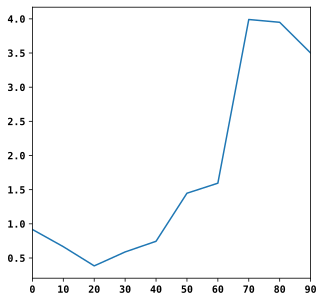

In [161]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

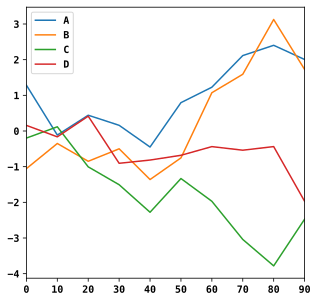

In [162]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

## 柱状图


In [1]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0],color='g',alpha=0.7)
data.plot.barh(ax=axes[1],color='g',alpha=0.7)

NameError: name 'plt' is not defined

In [153]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.093090,-1.152453,0.779991,-0.389146
10,-1.120879,-0.989960,2.254824,0.133477
20,-1.361201,-1.092851,1.979000,1.345421
30,-0.179549,-0.187342,0.875397,-0.799799
40,-1.174200,-0.552950,0.585956,-0.302524
50,-1.251174,0.302411,0.596233,-2.126348
60,-1.588942,0.183967,2.684667,-1.813579
70,-1.884295,-0.405862,3.833848,-0.722851
80,-2.569482,-2.100532,4.235800,-1.228432
90,-2.668423,-0.917723,2.187067,-1.230530


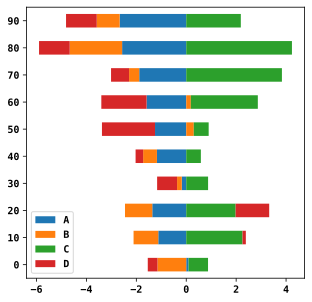

In [160]:
df.plot.barh(stacked=True, alpha=1)

## 直方图和密度图--.plot.hist()
## 散点图或点图--sns.regplot()
## 分面网络和分类数据--sns.factorplot()